In [47]:
import pandas as pd
import seaborn as sns
import h2o
import matplotlib.pyplot as plt

Carga de datos

In [10]:
df = pd.read_csv('dataset/BankChurners.csv')
df.shape

(10127, 23)

Observamos que tenemos 10127 datos en el dataset con 23 variables, una cantidad media. Además, antes de comenzar por recomendación del dueño del dataset eliminaremos las ultimas 2 variables.

In [14]:
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1)

In [27]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Tenemos los tipos de datos correctos para cada variable. Ahora procederemos a revisar los datos faltantes.

In [16]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

A primera vista no tenemos datos faltantes, por lo cual revisaremos las variables categoricas.

In [26]:
[df[col].unique().tolist() for col in df.select_dtypes(include='object')]

[['Existing Customer', 'Attrited Customer'],
 ['M', 'F'],
 ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 ['Married', 'Single', 'Unknown', 'Divorced'],
 ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 ['Blue', 'Gold', 'Silver', 'Platinum']]

Podemos observar que no hay variables equivalentes a nulos, a excepción de Unknown de Income_Category.

## Visualization

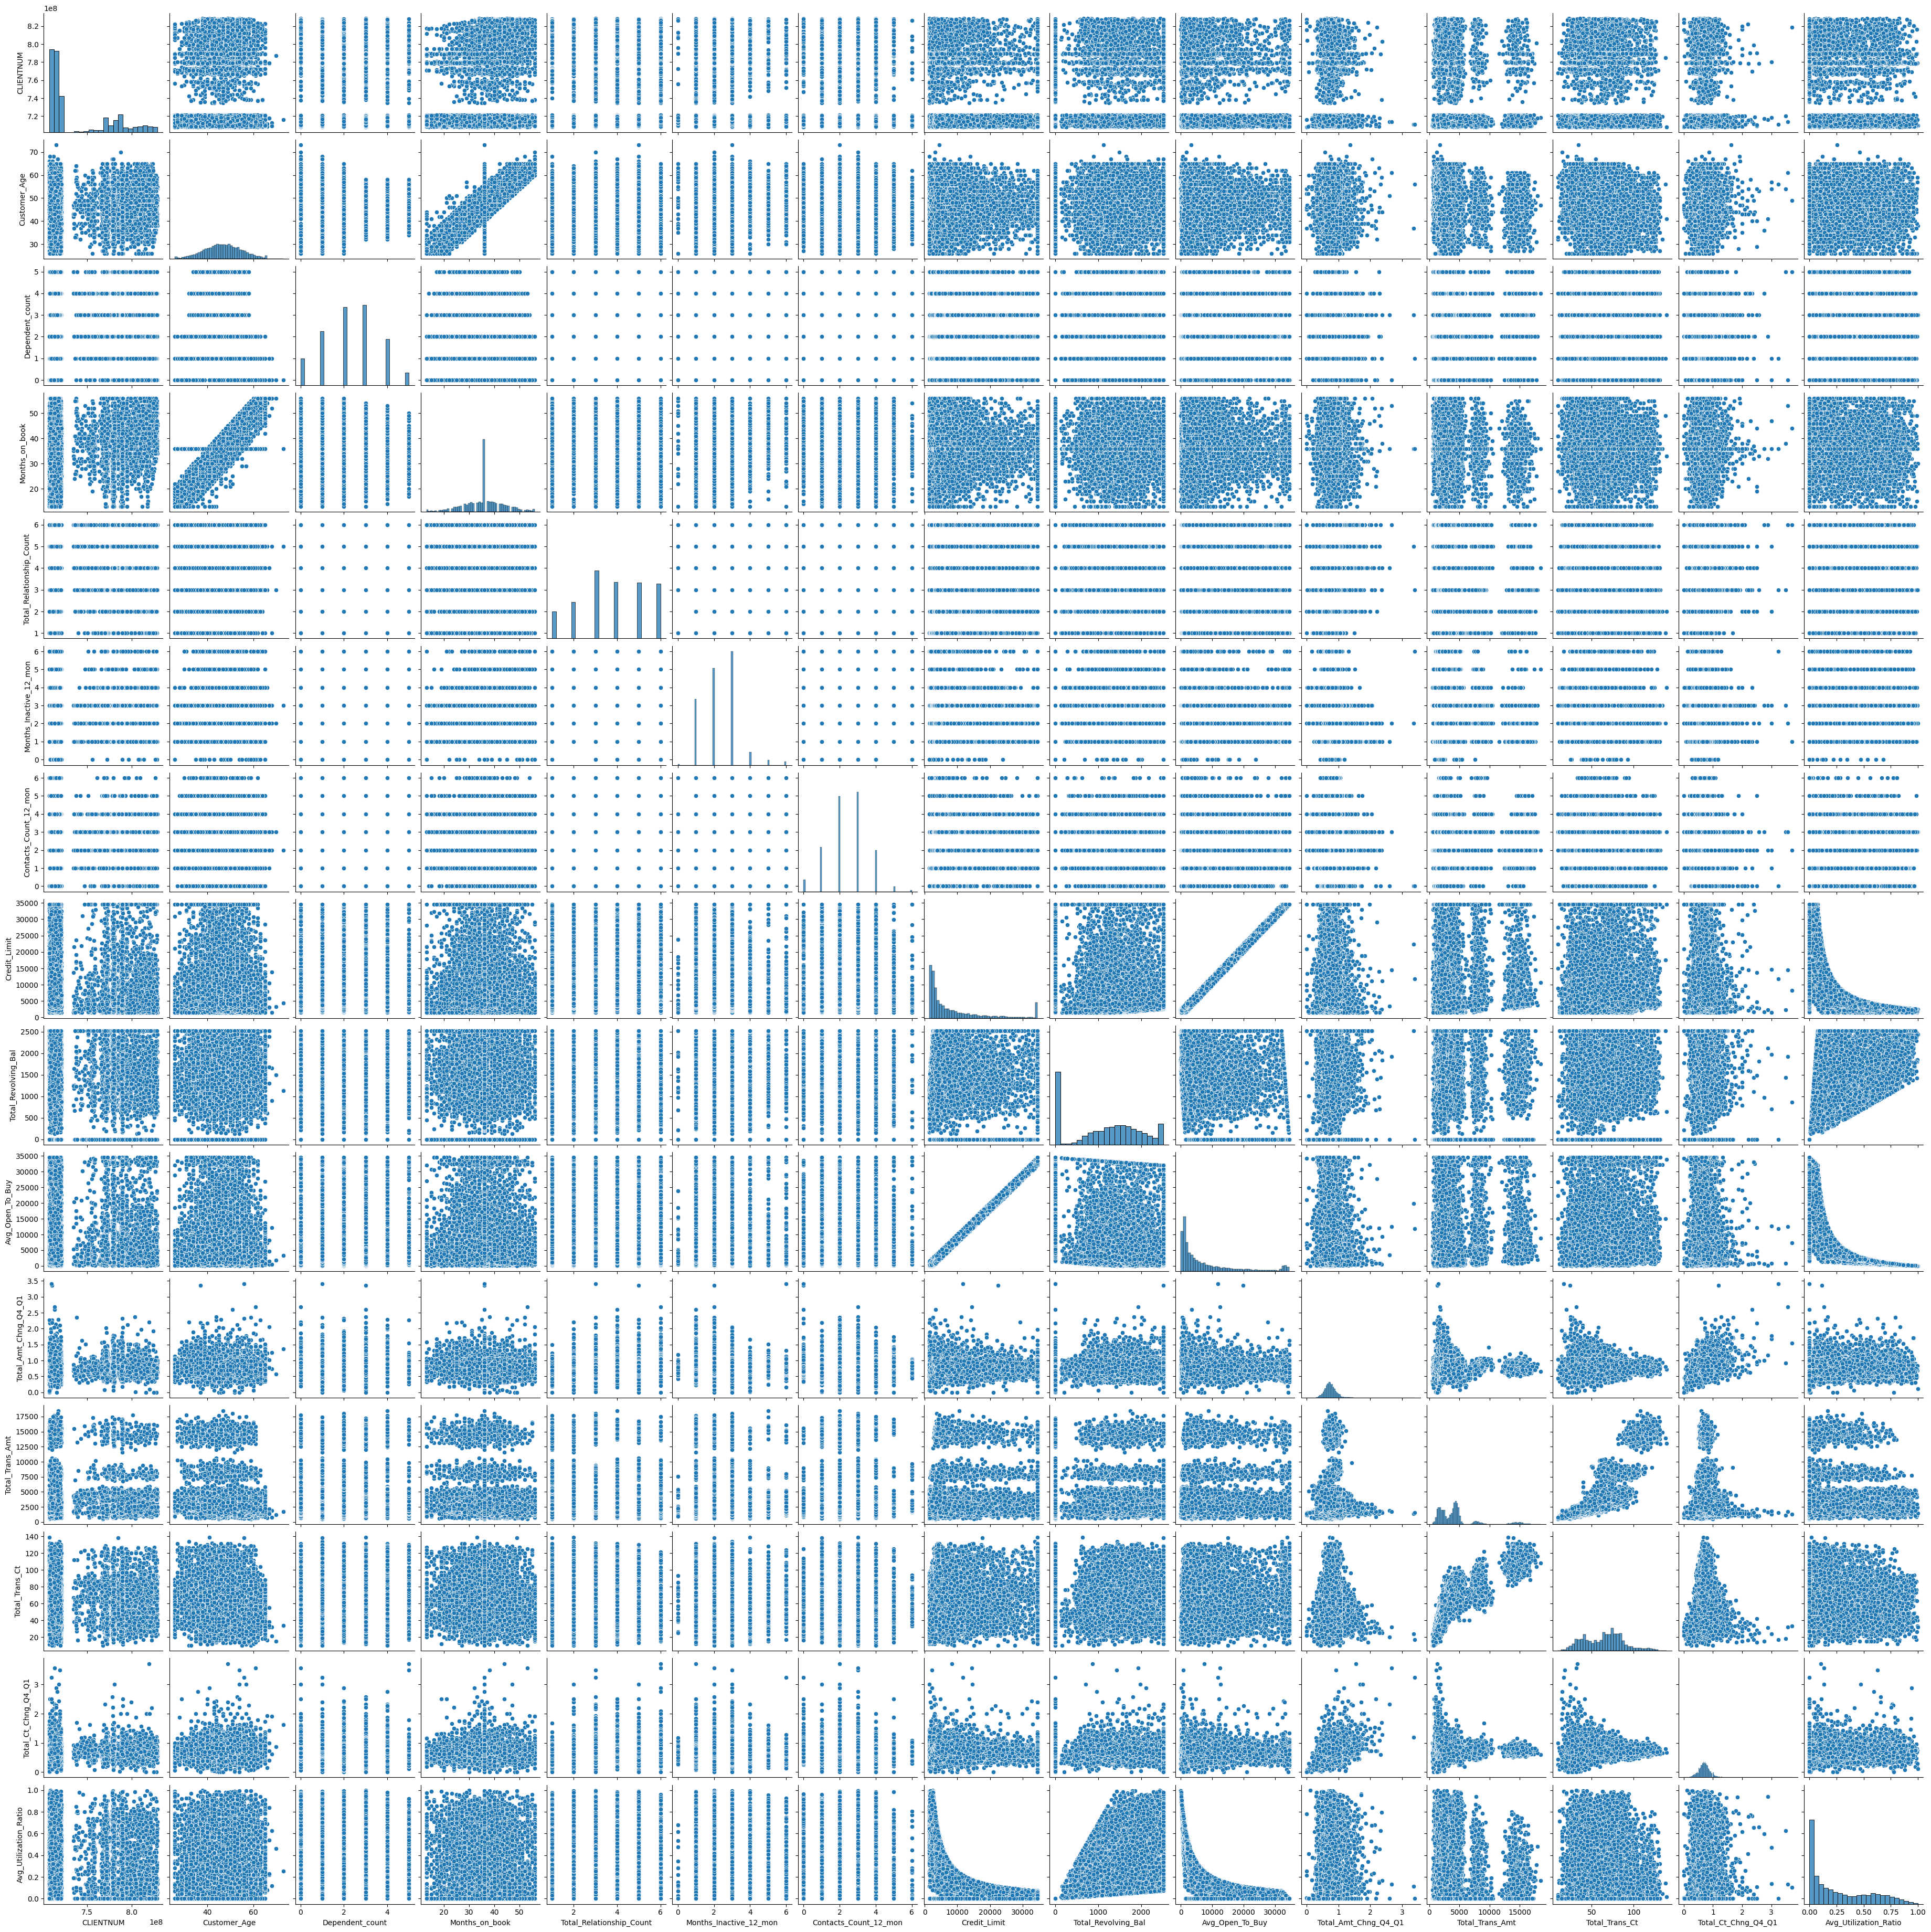

In [28]:
sns.pairplot(df)

Ante la visible ausencia de normalidad en la distribución de las variables, se utilizará la correlación de spearman

<Axes: >

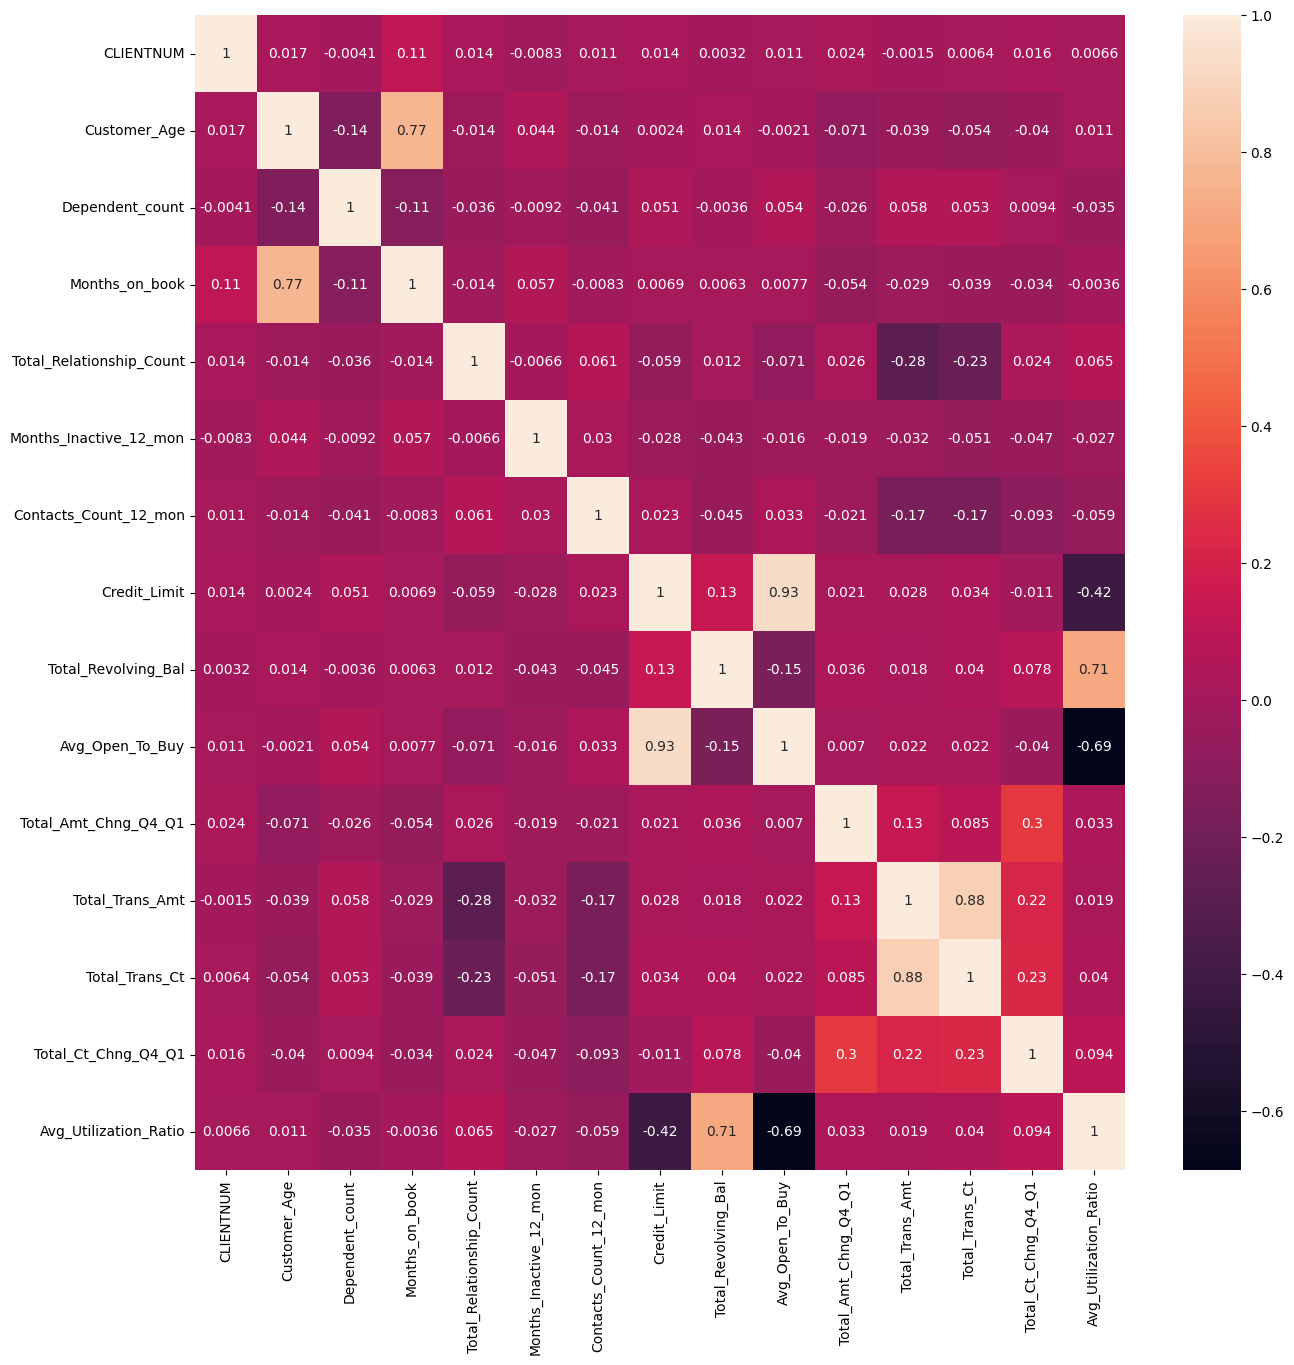

In [50]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(['int64', 'float']).corr(method='spearman'), annot=True)

Observamos una alta correlación (> 75%) entre 
* Avg_Open_Tp_Buy y Credit_Limit 93%
* Total_Trans_Ct y Total_Trans_Amt 88%
* Months_on_book y Customer_Age 77%

sns.barplot(df[''])

<Axes: xlabel='Attrition_Flag', ylabel='count'>

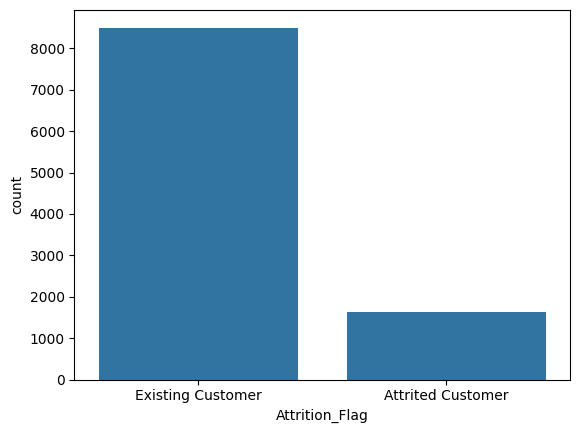

In [52]:
sns.barplot(df['Attrition_Flag'].value_counts())

<Axes: xlabel='Gender', ylabel='count'>

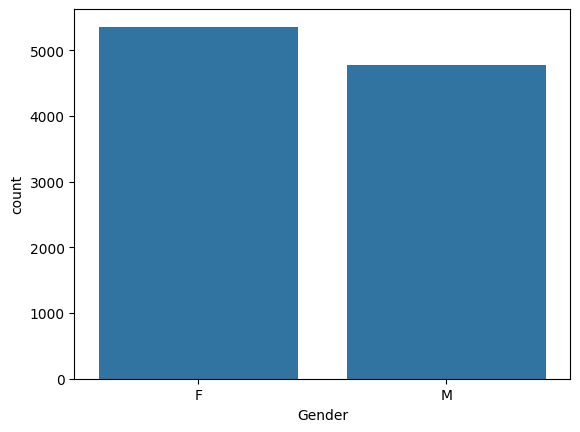

In [53]:
sns.barplot(df['Gender'].value_counts())

<Axes: xlabel='Education_Level', ylabel='count'>

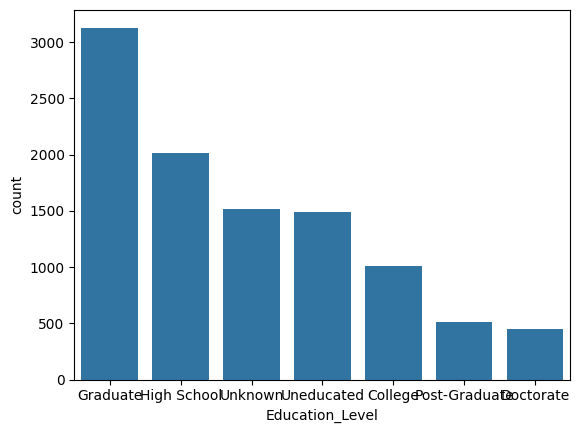

In [56]:
sns.barplot(df['Education_Level'].value_counts())

<Axes: xlabel='Marital_Status', ylabel='count'>

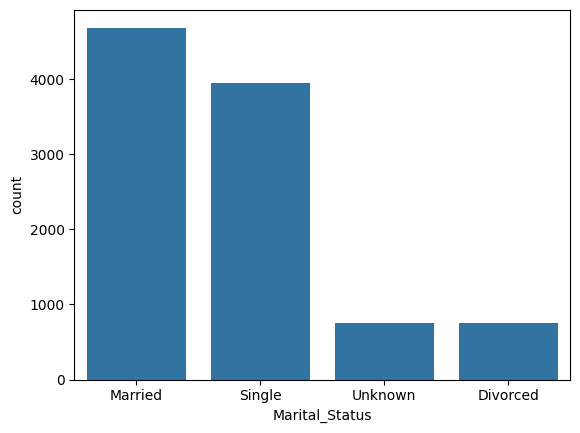

In [57]:
sns.barplot(df['Marital_Status'].value_counts())

<Axes: xlabel='Income_Category', ylabel='count'>

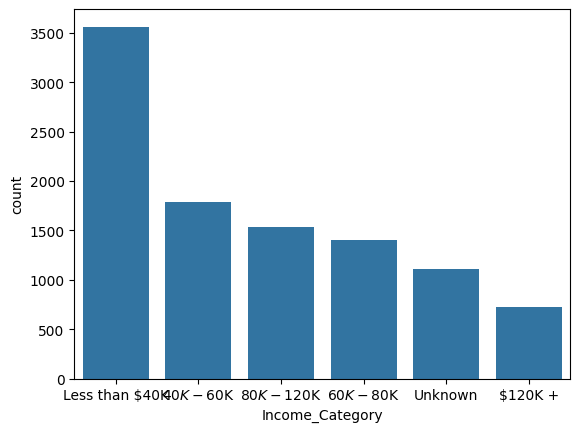

In [61]:
sns.barplot(df['Income_Category'].value_counts())

Podemos observar que los ingresos Unknown tiene una distribución semejante a otras categorias

<Axes: xlabel='Card_Category', ylabel='count'>

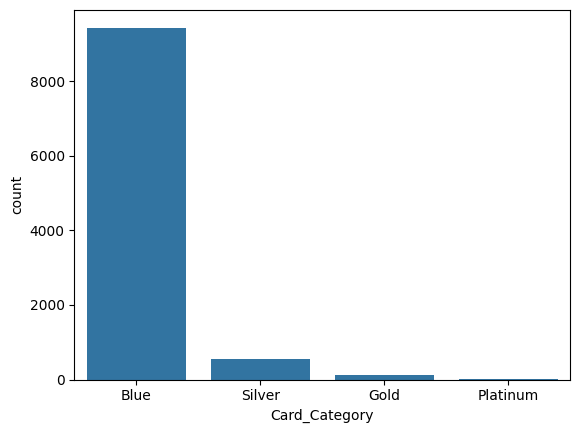

In [59]:
sns.barplot(df['Card_Category'].value_counts())


Tenemos poca representación de todas las categorias de tarjetas menos la Blue